In [1]:
import pandas 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [2]:
dataframe = pandas.read_csv("sonarall-data.csv", header=None)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
dataset = dataframe.values
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [4]:
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [5]:
Y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [6]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
encoded_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
model = Sequential()
model.add(Dense(60, input_dim=60, kernel_initializer="normal", activation="relu"))
model.add(Dense(1, kernel_initializer="normal", activation="sigmoid"))

C:\Users\LEGION\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5724 - loss: 0.6891 - val_accuracy: 1.0000 - val_loss: 0.6687
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6402 - loss: 0.6843 - val_accuracy: 0.0952 - val_loss: 0.7116
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7154 - loss: 0.6741 - val_accuracy: 0.4762 - val_loss: 0.6927
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7549 - loss: 0.6639 - val_accuracy: 0.5714 - val_loss: 0.6812
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7692 - loss: 0.6497 - val_accuracy: 0.2857 - val_loss: 0.7312
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7459 - loss: 0.6346 - val_accuracy: 0.4286 - val_loss: 0.6980
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7637 - loss: 0.6224 - val_accuracy: 0.4286 - val_loss: 0.7049
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7316 - loss: 0.6111 - val_accuracy: 0.3333 - 

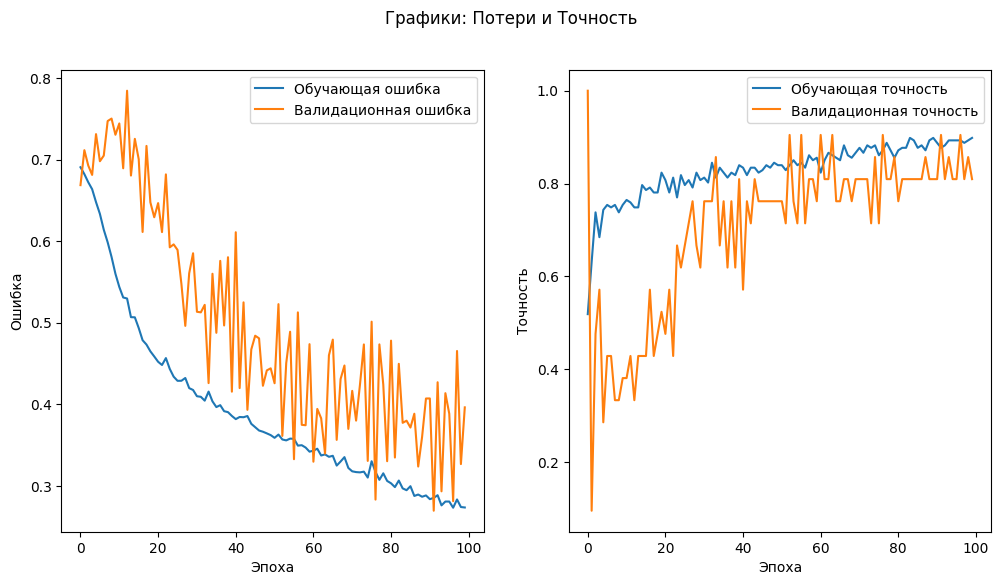

In [28]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# График потерь
ax1.plot(history.history['loss'], label='Обучающая ошибка')
ax1.plot(history.history['val_loss'], label='Валидационная ошибка')
ax1.set_xlabel('Эпоха')
ax1.set_ylabel('Ошибка')
ax1.legend()

# График точности
ax2.plot(history.history['accuracy'], label='Обучающая точность')
ax2.plot(history.history['val_accuracy'], label='Валидационная точность')
ax2.set_xlabel('Эпоха')
ax2.set_ylabel('Точность')
ax2.legend()

# Общий заголовок для всей фигуры
fig.suptitle("Графики: Потери и Точность")
plt.show()


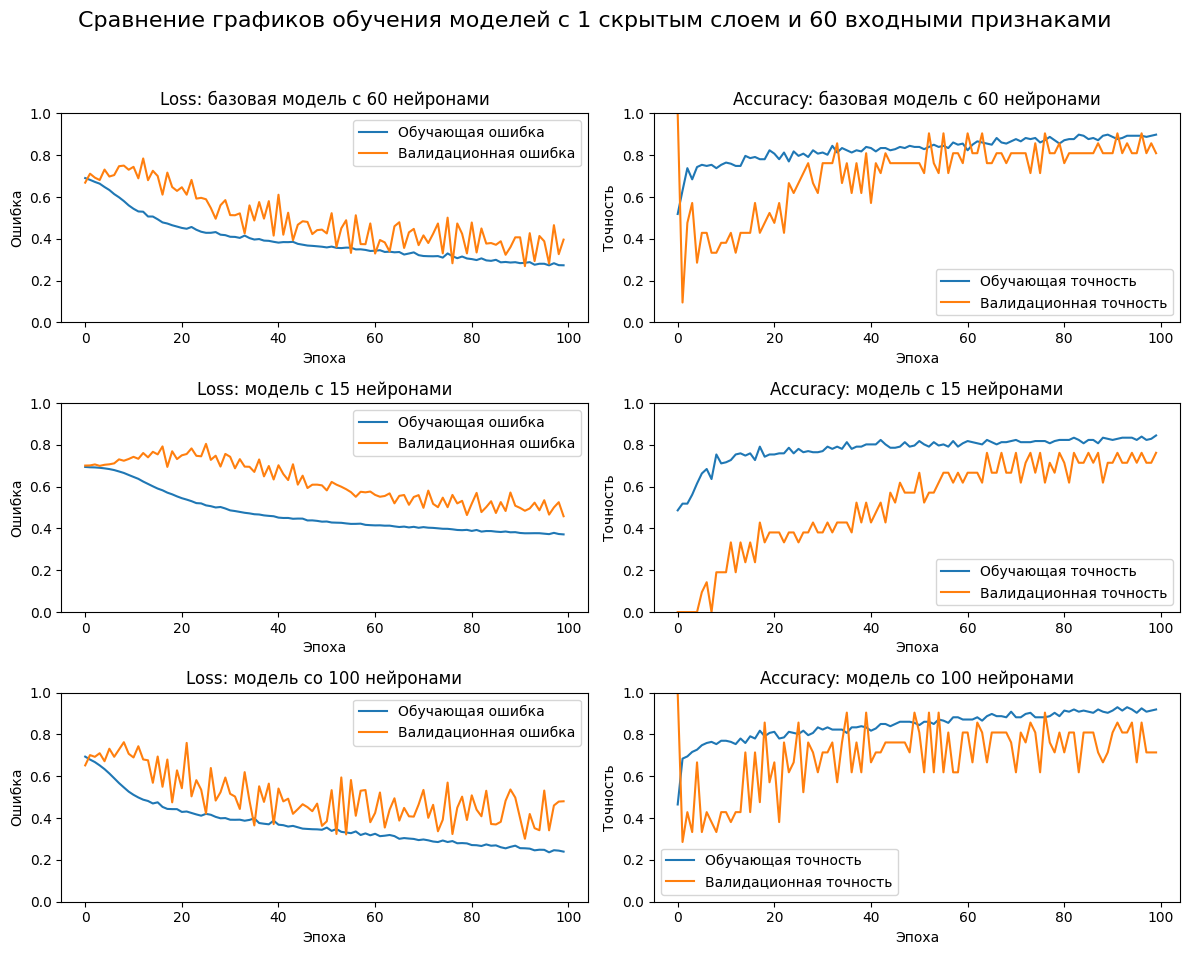

In [47]:
import matplotlib.pyplot as plt

# Создаем фигуру с сеткой 2x2
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# График потерь для базовой модели (history)
axes[0, 0].plot(history.history['loss'], label='Обучающая ошибка')
axes[0, 0].plot(history.history['val_loss'], label='Валидационная ошибка')
axes[0, 0].set_xlabel('Эпоха')
axes[0, 0].set_ylabel('Ошибка')
axes[0, 0].legend()
axes[0, 0].set_title("Loss: базовая модель c 60 нейронами")
axes[0, 0].set_ylim(0, 1)

# График точности для базовой модели (history)
axes[0, 1].plot(history.history['accuracy'], label='Обучающая точность')
axes[0, 1].plot(history.history['val_accuracy'], label='Валидационная точность')
axes[0, 1].set_xlabel('Эпоха')
axes[0, 1].set_ylabel('Точность')
axes[0, 1].legend()
axes[0, 1].set_title("Accuracy: базовая модель с 60 нейронами")
axes[0, 1].set_ylim(0, 1)

# График потерь для модели с 15 нейронами (history_15)
axes[1, 0].plot(history_15.history['loss'], label='Обучающая ошибка')
axes[1, 0].plot(history_15.history['val_loss'], label='Валидационная ошибка')
axes[1, 0].set_xlabel('Эпоха')
axes[1, 0].set_ylabel('Ошибка')
axes[1, 0].legend()
axes[1, 0].set_title("Loss: модель с 15 нейронами")
axes[1, 0].set_ylim(0, 1)

# График точности для модели с 15 нейронами (history_15)
axes[1, 1].plot(history_15.history['accuracy'], label='Обучающая точность')
axes[1, 1].plot(history_15.history['val_accuracy'], label='Валидационная точность')
axes[1, 1].set_xlabel('Эпоха')
axes[1, 1].set_ylabel('Точность')
axes[1, 1].legend()
axes[1, 1].set_title("Accuracy: модель с 15 нейронами")
axes[1, 1].set_ylim(0, 1)

# График потерь для модели со 100 нейронами (history_100)
axes[2, 0].plot(history_100.history['loss'], label='Обучающая ошибка')
axes[2, 0].plot(history_100.history['val_loss'], label='Валидационная ошибка')
axes[2, 0].set_xlabel('Эпоха')
axes[2, 0].set_ylabel('Ошибка')
axes[2, 0].legend()
axes[2, 0].set_title("Loss: модель со 100 нейронами")
axes[2, 0].set_ylim(0, 1)

# График точности для модели со 100 нейронами (history_15)
axes[2, 1].plot(history_100.history['accuracy'], label='Обучающая точность')
axes[2, 1].plot(history_100.history['val_accuracy'], label='Валидационная точность')
axes[2, 1].set_xlabel('Эпоха')
axes[2, 1].set_ylabel('Точность')
axes[2, 1].legend()
axes[2, 1].set_title("Accuracy: модель со 100 нейронами")
axes[2, 1].set_ylim(0, 1)

# Общий заголовок для всей фигуры
fig.suptitle("Сравнение графиков обучения моделей с 1 скрытым слоем и 60 входными признаками", fontsize=16)

# Подгоняем макет, чтобы заголовок не перекрывал субплоты
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [11]:
model_15 = Sequential()
model_15.add(Dense(15, input_dim=60, kernel_initializer="normal", activation="relu"))
model_15.add(Dense(1, kernel_initializer="normal", activation="sigmoid"))
model_15.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history_15 = model_15.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4680 - loss: 0.6945 - val_accuracy: 0.0000e+00 - val_loss: 0.7008
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5152 - loss: 0.6929 - val_accuracy: 0.0000e+00 - val_loss: 0.7015
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5558 - loss: 0.6908 - val_accuracy: 0.0000e+00 - val_loss: 0.7063
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5552 - loss: 0.6899 - val_accuracy: 0.0000e+00 - val_loss: 0.6995
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6429 - loss: 0.6877 - val_accuracy: 0.0000e+00 - val_loss: 0.7046
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6483 - loss: 0.6854 - val_accuracy: 0.0952 - val_loss: 0.7069
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6991 - loss: 0.6800 - val_accuracy: 0.1429 - val_loss: 0.7114
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6529 - loss: 0.6759 - val

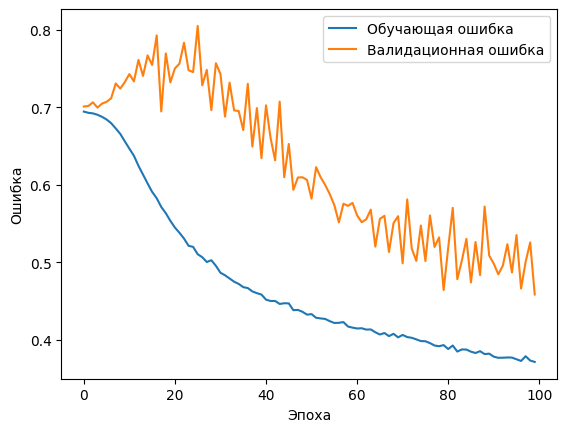

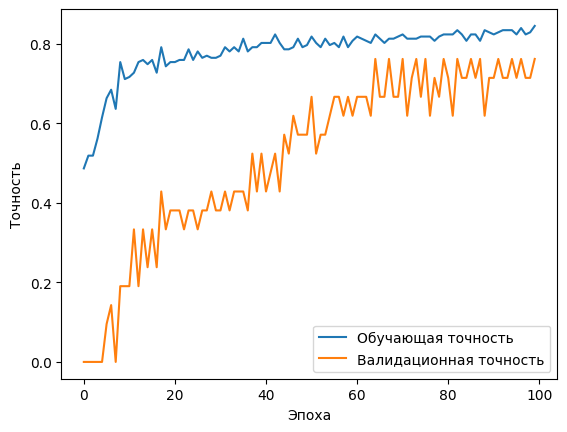

In [12]:
import matplotlib.pyplot as plt

# График потерь
plt.figure()
plt.plot(history_15.history['loss'], label='Обучающая ошибка')
plt.plot(history_15.history['val_loss'], label='Валидационная ошибка')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# График точности
plt.figure()
plt.plot(history_15.history['accuracy'], label='Обучающая точность')
plt.plot(history_15.history['val_accuracy'], label='Валидационная точность')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()


In [13]:
model_100 = Sequential()
model_100.add(Dense(100, input_dim=60, kernel_initializer="normal", activation="relu"))
model_100.add(Dense(1, kernel_initializer="normal", activation="sigmoid"))
model_100.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history_100 = model_100.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4865 - loss: 0.6921 - val_accuracy: 1.0000 - val_loss: 0.6522
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6313 - loss: 0.6816 - val_accuracy: 0.2857 - val_loss: 0.7014
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7057 - loss: 0.6659 - val_accuracy: 0.4286 - val_loss: 0.6932
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7433 - loss: 0.6544 - val_accuracy: 0.3333 - val_loss: 0.7105
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7103 - loss: 0.6393 - val_accuracy: 0.6667 - val_loss: 0.6721
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7229 - loss: 0.6232 - val_accuracy: 0.3333 - val_loss: 0.7320
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7417 - loss: 0.6125 - val_accuracy: 0.4286 - val_loss: 0.6933
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7329 - loss: 0.5798 - val_accuracy: 0.3810 - 

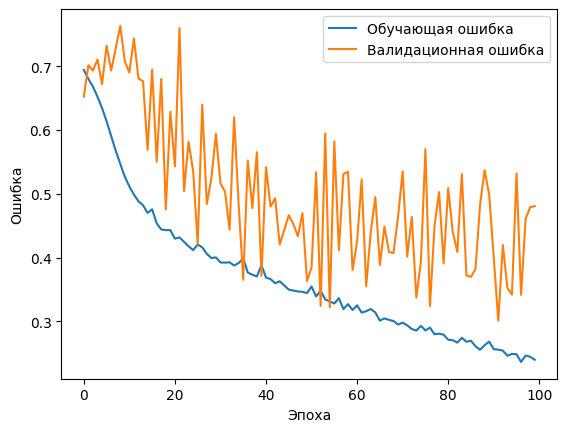

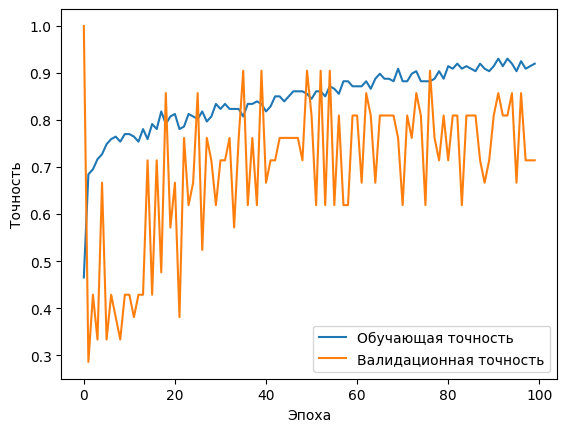

In [14]:
import matplotlib.pyplot as plt

# График потерь
plt.figure()
plt.plot(history_100.history['loss'], label='Обучающая ошибка')
plt.plot(history_100.history['val_loss'], label='Валидационная ошибка')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# График точности
plt.figure()
plt.plot(history_100.history['accuracy'], label='Обучающая точность')
plt.plot(history_100.history['val_accuracy'], label='Валидационная точность')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()


In [15]:
X_less = X[:, :30]

In [16]:
model_less = Sequential()
model_less.add(Dense(60, input_dim=30, kernel_initializer="normal", activation="relu"))
model_less.add(Dense(1, kernel_initializer="normal", activation="sigmoid"))
model_less.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history_less = model_less.fit(X_less, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5530 - loss: 0.6938 - val_accuracy: 0.0000e+00 - val_loss: 0.7203
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5508 - loss: 0.6903 - val_accuracy: 0.0000e+00 - val_loss: 0.7086
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6037 - loss: 0.6876 - val_accuracy: 0.0000e+00 - val_loss: 0.7132
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6796 - loss: 0.6783 - val_accuracy: 0.0000e+00 - val_loss: 0.7342
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6970 - loss: 0.6734 - val_accuracy: 0.0476 - val_loss: 0.7326
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6749 - loss: 0.6637 - val_accuracy: 0.0000e+00 - val_loss: 0.7935
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6548 - loss: 0.6606 - val_accuracy: 0.0476 - val_loss: 0.7614
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7003 - loss: 0.6526 - val

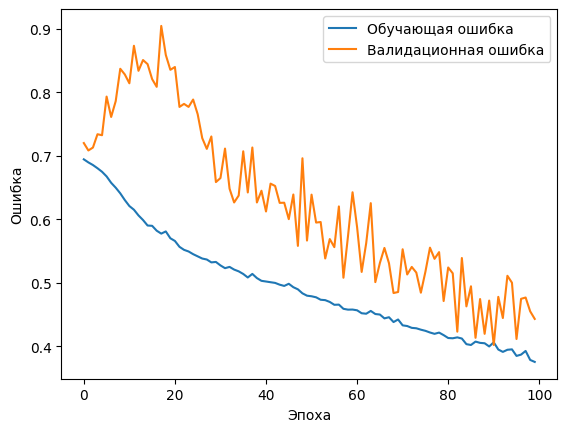

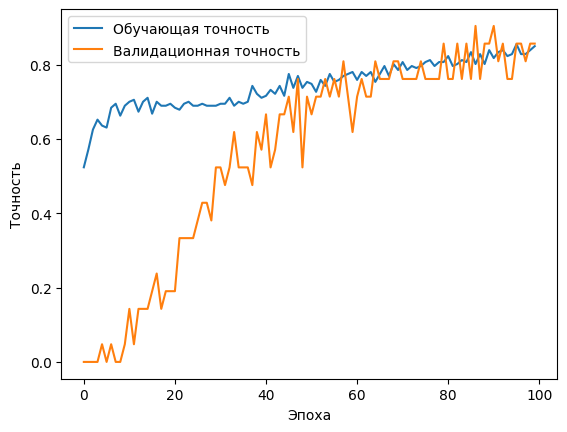

In [17]:
# График потерь
plt.figure()
plt.plot(history_less.history['loss'], label='Обучающая ошибка')
plt.plot(history_less.history['val_loss'], label='Валидационная ошибка')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# График точности
plt.figure()
plt.plot(history_less.history['accuracy'], label='Обучающая точность')
plt.plot(history_less.history['val_accuracy'], label='Валидационная точность')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [18]:
model_less_two = Sequential()
model_less_two.add(Dense(15, input_dim=30, kernel_initializer="normal", activation="relu"))
model_less_two.add(Dense(1, kernel_initializer="normal", activation="sigmoid"))
model_less_two.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history_less_two = model_less_two.fit(X_less, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4613 - loss: 0.6941 - val_accuracy: 0.0476 - val_loss: 0.6946
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5899 - loss: 0.6926 - val_accuracy: 0.5238 - val_loss: 0.6928
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6181 - loss: 0.6913 - val_accuracy: 1.0000 - val_loss: 0.6866
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5726 - loss: 0.6923 - val_accuracy: 0.1905 - val_loss: 0.6948
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6501 - loss: 0.6904 - val_accuracy: 0.7143 - val_loss: 0.6917
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6531 - loss: 0.6898 - val_accuracy: 0.4286 - val_loss: 0.6941
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6238 - loss: 0.6887 - val_accuracy: 0.4762 - val_loss: 0.6942
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6251 - loss: 0.6870 - val_accuracy: 0.2857 - 

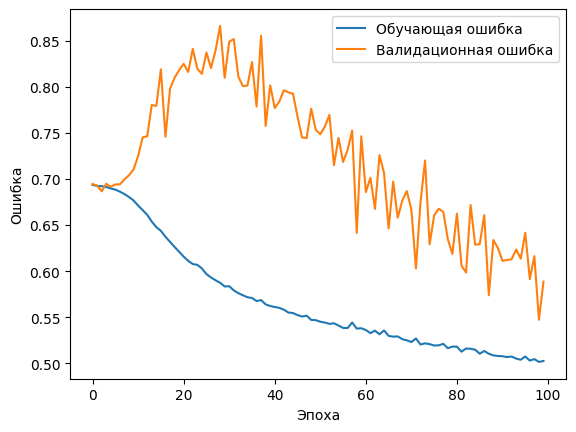

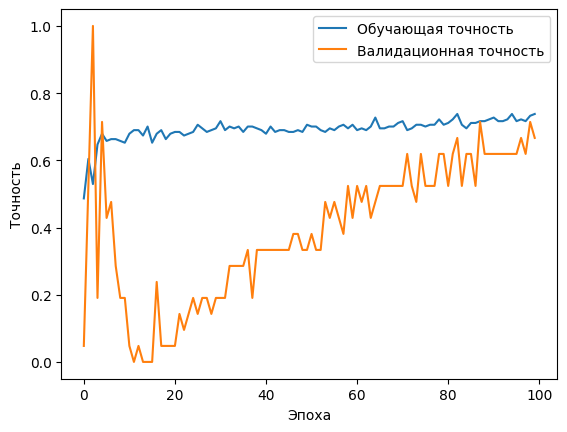

In [19]:
# График потерь
plt.figure()
plt.plot(history_less_two.history['loss'], label='Обучающая ошибка')
plt.plot(history_less_two.history['val_loss'], label='Валидационная ошибка')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# График точности
plt.figure()
plt.plot(history_less_two.history['accuracy'], label='Обучающая точность')
plt.plot(history_less_two.history['val_accuracy'], label='Валидационная точность')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [20]:
model_less_three = Sequential()
model_less_three.add(Dense(100, input_dim=30, kernel_initializer="normal", activation="relu"))
model_less_three.add(Dense(1, kernel_initializer="normal", activation="sigmoid"))
model_less_three.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history_less_three = model_less_three.fit(X_less, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4849 - loss: 0.6934 - val_accuracy: 0.4286 - val_loss: 0.6918
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6042 - loss: 0.6883 - val_accuracy: 0.3333 - val_loss: 0.6972
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6896 - loss: 0.6776 - val_accuracy: 0.1429 - val_loss: 0.7127
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6355 - loss: 0.6750 - val_accuracy: 0.0952 - val_loss: 0.7327
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6356 - loss: 0.6667 - val_accuracy: 0.3333 - val_loss: 0.7160
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6778 - loss: 0.6540 - val_accuracy: 0.0000e+00 - val_loss: 0.8351
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6690 - loss: 0.6471 - val_accuracy: 0.0476 - val_loss: 0.7949
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7025 - loss: 0.6418 - val_accuracy: 0.047

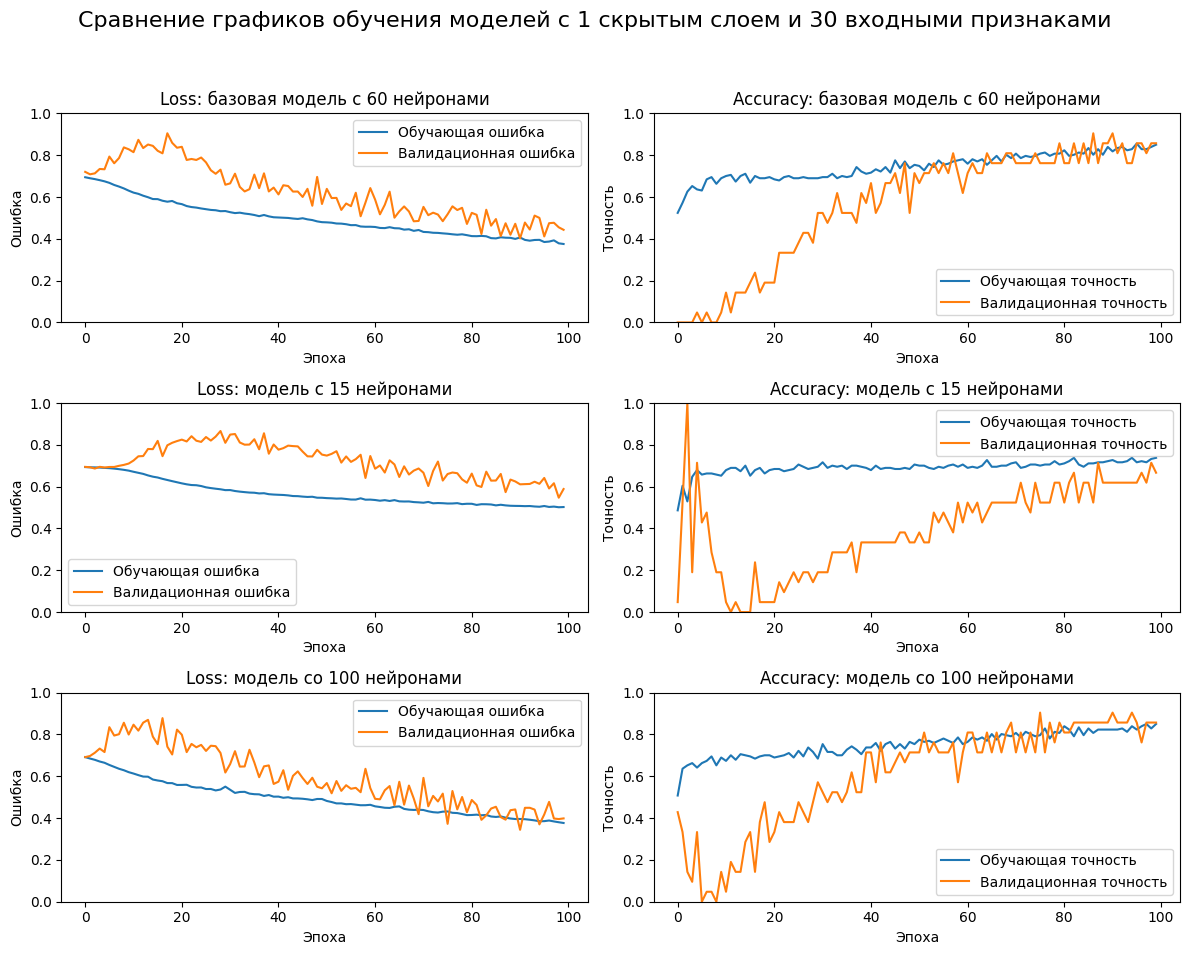

In [46]:
import matplotlib.pyplot as plt

# Создаем фигуру с сеткой 2x2
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# График потерь для базовой модели (history)
axes[0, 0].plot(history_less.history['loss'], label='Обучающая ошибка')
axes[0, 0].plot(history_less.history['val_loss'], label='Валидационная ошибка')
axes[0, 0].set_xlabel('Эпоха')
axes[0, 0].set_ylabel('Ошибка')
axes[0, 0].legend()
axes[0, 0].set_title("Loss: базовая модель c 60 нейронами")
axes[0, 0].set_ylim(0, 1)

# График точности для базовой модели (history)
axes[0, 1].plot(history_less.history['accuracy'], label='Обучающая точность')
axes[0, 1].plot(history_less.history['val_accuracy'], label='Валидационная точность')
axes[0, 1].set_xlabel('Эпоха')
axes[0, 1].set_ylabel('Точность')
axes[0, 1].legend()
axes[0, 1].set_title("Accuracy: базовая модель с 60 нейронами")
axes[0, 1].set_ylim(0, 1)

# График потерь для модели с 15 нейронами (history_15)
axes[1, 0].plot(history_less_two.history['loss'], label='Обучающая ошибка')
axes[1, 0].plot(history_less_two.history['val_loss'], label='Валидационная ошибка')
axes[1, 0].set_xlabel('Эпоха')
axes[1, 0].set_ylabel('Ошибка')
axes[1, 0].legend()
axes[1, 0].set_title("Loss: модель с 15 нейронами")
axes[1, 0].set_ylim(0, 1)

# График точности для модели с 15 нейронами (history_15)
axes[1, 1].plot(history_less_two.history['accuracy'], label='Обучающая точность')
axes[1, 1].plot(history_less_two.history['val_accuracy'], label='Валидационная точность')
axes[1, 1].set_xlabel('Эпоха')
axes[1, 1].set_ylabel('Точность')
axes[1, 1].legend()
axes[1, 1].set_title("Accuracy: модель с 15 нейронами")
axes[1, 1].set_ylim(0, 1)

# График потерь для модели со 100 нейронами (history_100)
axes[2, 0].plot(history_less_three.history['loss'], label='Обучающая ошибка')
axes[2, 0].plot(history_less_three.history['val_loss'], label='Валидационная ошибка')
axes[2, 0].set_xlabel('Эпоха')
axes[2, 0].set_ylabel('Ошибка')
axes[2, 0].legend()
axes[2, 0].set_title("Loss: модель со 100 нейронами")
axes[2, 0].set_ylim(0, 1)

# График точности для модели со 100 нейронами (history_15)
axes[2, 1].plot(history_less_three.history['accuracy'], label='Обучающая точность')
axes[2, 1].plot(history_less_three.history['val_accuracy'], label='Валидационная точность')
axes[2, 1].set_xlabel('Эпоха')
axes[2, 1].set_ylabel('Точность')
axes[2, 1].legend()
axes[2, 1].set_title("Accuracy: модель со 100 нейронами")
axes[2, 1].set_ylim(0, 1)

# Общий заголовок для всей фигуры
fig.suptitle("Сравнение графиков обучения моделей с 1 скрытым слоем и 30 входными признаками", fontsize=16)

# Подгоняем макет, чтобы заголовок не перекрывал субплоты
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


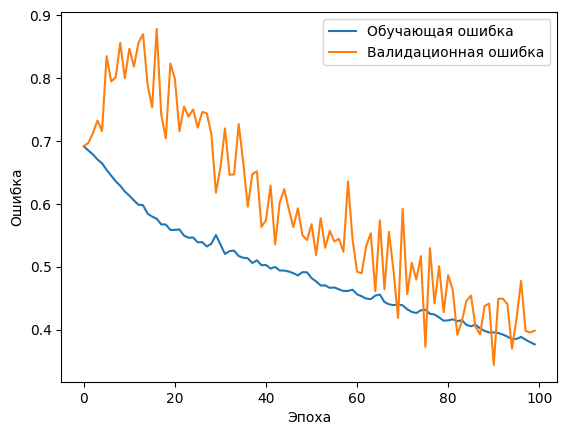

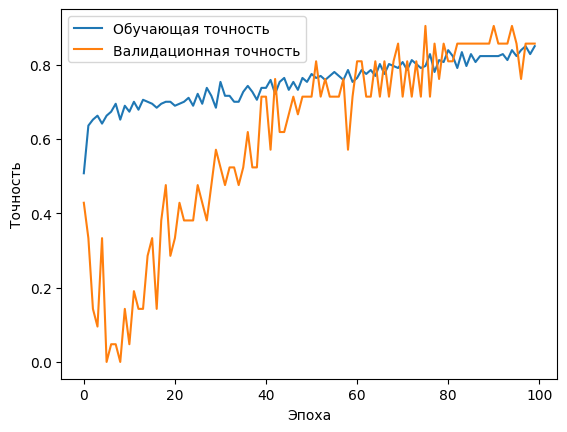

In [21]:
# График потерь
plt.figure()
plt.plot(history_less_three.history['loss'], label='Обучающая ошибка')
plt.plot(history_less_three.history['val_loss'], label='Валидационная ошибка')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# График точности
plt.figure()
plt.plot(history_less_three.history['accuracy'], label='Обучающая точность')
plt.plot(history_less_three.history['val_accuracy'], label='Валидационная точность')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [22]:
model_less_15 = Sequential()
model_less_15.add(Dense(60, input_dim=30, kernel_initializer="normal", activation="relu"))
model_less_15.add(Dense(60, input_dim=15, kernel_initializer="normal", activation="relu"))
model_less_15.add(Dense(1, kernel_initializer="normal", activation="sigmoid"))
model_less_15.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history_less_15 = model_less_15.fit(X_less, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4843 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 0.6994
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6249 - loss: 0.6911 - val_accuracy: 0.0000e+00 - val_loss: 0.7075
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6313 - loss: 0.6875 - val_accuracy: 0.1429 - val_loss: 0.7082
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6175 - loss: 0.6821 - val_accuracy: 0.2857 - val_loss: 0.7127
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6824 - loss: 0.6640 - val_accuracy: 0.0000e+00 - val_loss: 0.8012
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6127 - loss: 0.6654 - val_accuracy: 0.3810 - val_loss: 0.7240
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6914 - loss: 0.6368 - val_accuracy: 0.2381 - val_loss: 0.7977
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6592 - loss: 0.6219 - val_accurac

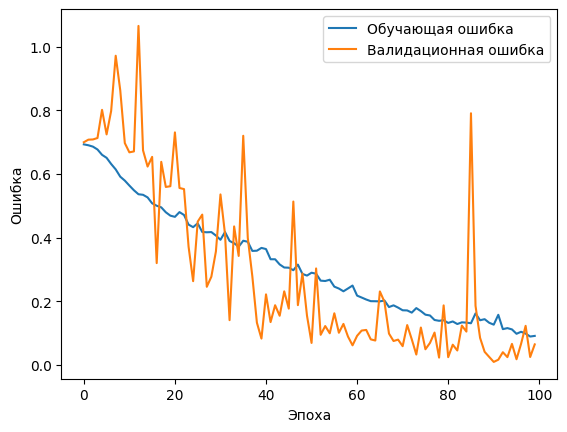

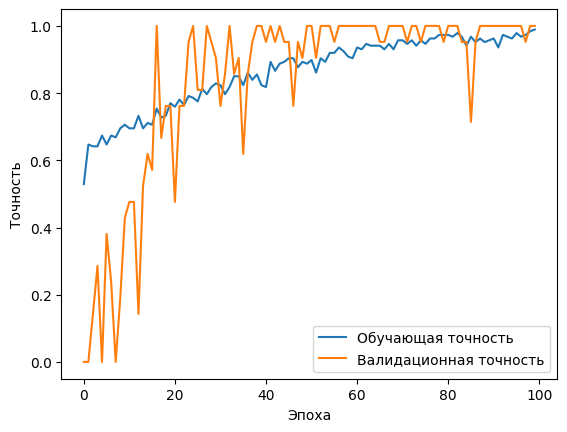

In [23]:
# График потерь
plt.figure()
plt.plot(history_less_15.history['loss'], label='Обучающая ошибка')
plt.plot(history_less_15.history['val_loss'], label='Валидационная ошибка')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# График точности
plt.figure()
plt.plot(history_less_15.history['accuracy'], label='Обучающая точность')
plt.plot(history_less_15.history['val_accuracy'], label='Валидационная точность')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [24]:
model_less_15_two = Sequential()
model_less_15_two.add(Dense(15, input_dim=30, kernel_initializer="normal", activation="relu"))
model_less_15_two.add(Dense(15, input_dim=15, kernel_initializer="normal", activation="relu"))
model_less_15_two.add(Dense(1, kernel_initializer="normal", activation="sigmoid"))
model_less_15_two.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history_less_15_two = model_less_15_two.fit(X_less, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5312 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 0.6988
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5330 - loss: 0.6928 - val_accuracy: 0.0000e+00 - val_loss: 0.6996
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5573 - loss: 0.6920 - val_accuracy: 0.0000e+00 - val_loss: 0.7014
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5309 - loss: 0.6917 - val_accuracy: 0.0000e+00 - val_loss: 0.7015
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5431 - loss: 0.6907 - val_accuracy: 0.0000e+00 - val_loss: 0.7085
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5619 - loss: 0.6897 - val_accuracy: 0.0000e+00 - val_loss: 0.7181
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6048 - loss: 0.6886 - val_accuracy: 0.0000e+00 - val_loss: 0.7189
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6634 - loss: 0.68

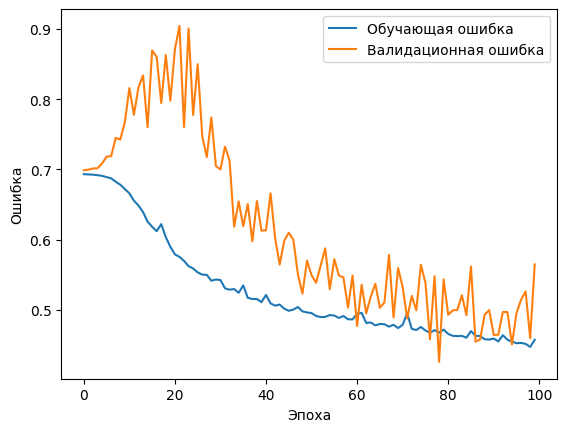

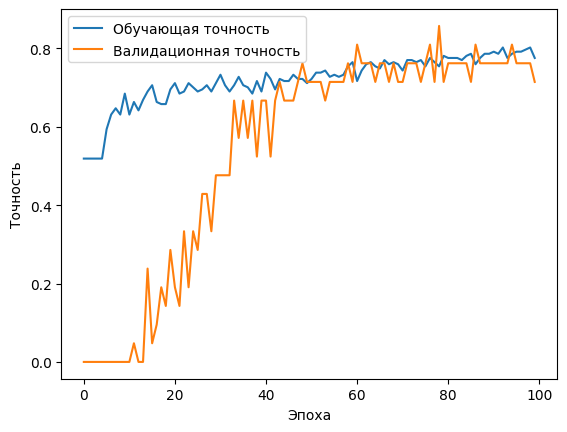

In [25]:
# График потерь
plt.figure()
plt.plot(history_less_15_two.history['loss'], label='Обучающая ошибка')
plt.plot(history_less_15_two.history['val_loss'], label='Валидационная ошибка')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# График точности
plt.figure()
plt.plot(history_less_15_two.history['accuracy'], label='Обучающая точность')
plt.plot(history_less_15_two.history['val_accuracy'], label='Валидационная точность')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [41]:
model_less_15_three = Sequential()
model_less_15_three.add(Dense(100, input_dim=30, kernel_initializer="normal", activation="relu"))
model_less_15_three.add(Dense(100, input_dim=15, kernel_initializer="normal", activation="relu"))
model_less_15_three.add(Dense(1, kernel_initializer="normal", activation="sigmoid"))
model_less_15_three.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history_less_15_three = model_less_15_three.fit(X_less, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4805 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.7190
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6327 - loss: 0.6864 - val_accuracy: 0.0000e+00 - val_loss: 0.7262
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6782 - loss: 0.6749 - val_accuracy: 0.0952 - val_loss: 0.7380
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6223 - loss: 0.6668 - val_accuracy: 0.6190 - val_loss: 0.6715
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6820 - loss: 0.6405 - val_accuracy: 0.0000e+00 - val_loss: 0.9832
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7163 - loss: 0.6039 - val_accuracy: 0.0476 - val_loss: 0.9243
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7007 - loss: 0.5981 - val_accuracy: 0.3333 - val_loss: 0.7772
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7338 - loss: 0.5565 - val_accurac

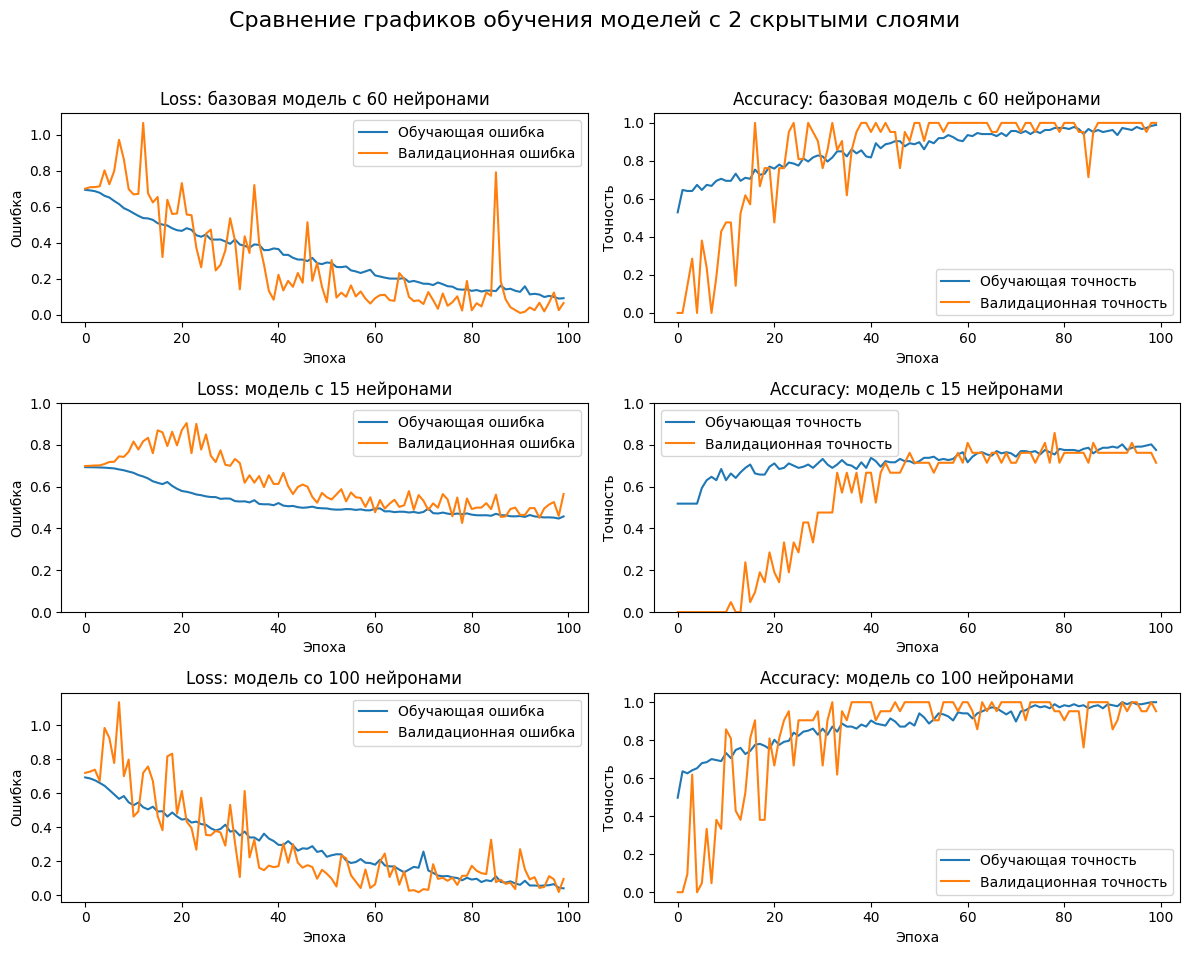

In [48]:
import matplotlib.pyplot as plt

# Создаем фигуру с сеткой 2x2
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# График потерь для базовой модели (history)
axes[0, 0].plot(history_less_15.history['loss'], label='Обучающая ошибка')
axes[0, 0].plot(history_less_15.history['val_loss'], label='Валидационная ошибка')
axes[0, 0].set_xlabel('Эпоха')
axes[0, 0].set_ylabel('Ошибка')
axes[0, 0].legend()
axes[0, 0].set_title("Loss: базовая модель c 60 нейронами")

# График точности для базовой модели (history)
axes[0, 1].plot(history_less_15.history['accuracy'], label='Обучающая точность')
axes[0, 1].plot(history_less_15.history['val_accuracy'], label='Валидационная точность')
axes[0, 1].set_xlabel('Эпоха')
axes[0, 1].set_ylabel('Точность')
axes[0, 1].legend()
axes[0, 1].set_title("Accuracy: базовая модель с 60 нейронами")

# График потерь для модели с 15 нейронами (history_15)
axes[1, 0].plot(history_less_15_two.history['loss'], label='Обучающая ошибка')
axes[1, 0].plot(history_less_15_two.history['val_loss'], label='Валидационная ошибка')
axes[1, 0].set_xlabel('Эпоха')
axes[1, 0].set_ylabel('Ошибка')
axes[1, 0].legend()
axes[1, 0].set_title("Loss: модель с 15 нейронами")
axes[1, 0].set_ylim(0, 1)

# График точности для модели с 15 нейронами (history_15)
axes[1, 1].plot(history_less_15_two.history['accuracy'], label='Обучающая точность')
axes[1, 1].plot(history_less_15_two.history['val_accuracy'], label='Валидационная точность')
axes[1, 1].set_xlabel('Эпоха')
axes[1, 1].set_ylabel('Точность')
axes[1, 1].legend()
axes[1, 1].set_title("Accuracy: модель с 15 нейронами")
axes[1, 1].set_ylim(0, 1)

# График потерь для модели со 100 нейронами (history_100)
axes[2, 0].plot(history_less_15_three.history['loss'], label='Обучающая ошибка')
axes[2, 0].plot(history_less_15_three.history['val_loss'], label='Валидационная ошибка')
axes[2, 0].set_xlabel('Эпоха')
axes[2, 0].set_ylabel('Ошибка')
axes[2, 0].legend()
axes[2, 0].set_title("Loss: модель со 100 нейронами")

# График точности для модели со 100 нейронами (history_15)
axes[2, 1].plot(history_less_15_three.history['accuracy'], label='Обучающая точность')
axes[2, 1].plot(history_less_15_three.history['val_accuracy'], label='Валидационная точность')
axes[2, 1].set_xlabel('Эпоха')
axes[2, 1].set_ylabel('Точность')
axes[2, 1].legend()
axes[2, 1].set_title("Accuracy: модель со 100 нейронами")

# Общий заголовок для всей фигуры
fig.suptitle("Сравнение графиков обучения моделей с 2 скрытыми слоями", fontsize=16)

# Подгоняем макет, чтобы заголовок не перекрывал субплоты
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
